# Linear Regression

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Jephian Lin</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

##### Overview
Given a set of $N$ data $(x_i,y_i)$ for $i=1,\ldots,N$,
**linear regression** aims to find a line 

> $y=ax+b$

that best describes the data.  

That is, the goal is  
to find two values $a$ and $b$ such that  

> $\sum_i^N (y_i - ax_i - b)^2$

is minimized.

##### Algorithm
1. Create an $N\times 2$ matrix $A=\begin{bmatrix}x_1 & 1 \\ \vdots & \vdots \\ x_N & 1 \end{bmatrix}$ and a vector $v=\begin{bmatrix}y_1 \\ \vdots \\ y_N \end{bmatrix}$.
2. Then compute 

> $\begin{bmatrix} a \\ b \end{bmatrix} = (A^\top A)^{-1} A^\top v$

Note: If $(A^\top A)^{-1}$ does not exist, use the Penrose&ndash;Moore pseudo inverse instead.

##### Explanation
The goal is to solve the equation 

> $Ax = v$, where $x = \begin{bmatrix} a \\ b \end{bmatrix}$

for $x$.  

The equation does not always have a solution.  
If not solvable, we find a vector $x$ such that 

> $|Ax-v|^2 = \sum_i^N (y_i - ax_i - b)^2$ 

is minimized.  

To do so, let $v_0$ be the orthogonal projection of $v$ onto the column space of $A$.  
By the formula of orthogonal projection 

> $v_0 = A(A^\top A)^{-1}A^\top v$.

Now solve $Ax=v_0$ and get $x=(A^\top A)^{-1}A^\top v$.  
Therefore,  

> $\begin{bmatrix} a \\ b \end{bmatrix} = (A^\top A)^{-1}A^\top v$.

##### Implimentation

In [1]:
def linear_regression(data, draw=False):
    """
    Input:
        data: a list of pairs [(x1,y1), ..., (xN,yN)]
    Output:
        Output [a,b] so that the line y = ax + b  
        is the best fitting line for the data.
        When draw == True, 
        create a graphical illustration p and return [a,b,p].
    """
    NN = len(data)
    ### x_list = [x1, x2, ..., xN]
    x_list = [p[0] for p in data]
    ### one_list = [1,1, ..., 1]
    one_list = [1] * NN
    ### y_list = [y1, y2, ..., yN]
    y_list = [p[1] for p in data]
    ### define A and v as described in the algorithm
    A = matrix([x_list, one_list]).transpose()
    v = matrix([y_list]).transpose()
    AT = A.transpose()
    ATA = AT * A
    ATAinv = ATA.pseudoinverse()
    ans = ATAinv * AT * v
    a, b = ans.transpose()[0]
    
    if draw:
        x_min = min(x_list)
        x_max = max(x_list)
        x_range = x_max - x_min
        x = var('x')
        pic = (a*x + b).plot(xmin=x_min-0.1*x_range, 
                             xmax=x_max+0.1*x_range)
        pic += point(data, rgbcolor='red', size=30)

        return [a,b,pic]
    
    return [a,b]

##### Examples

(0, 1)


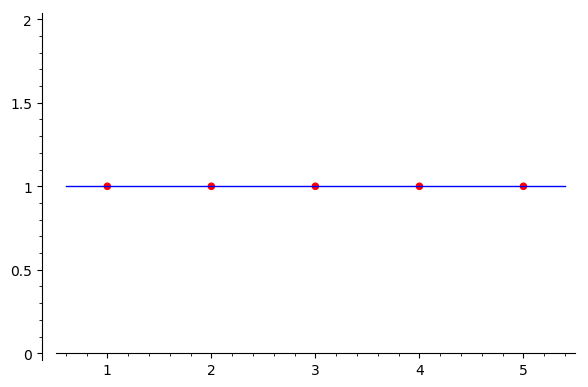

In [2]:
### horizontal data
data = [(1,1),(2,1),(3,1),(4,1),(5,1)] 

a,b,p = linear_regression(data,True)
print(a,b)
p.show()

(0.500000000000000, 0.500000000000000)


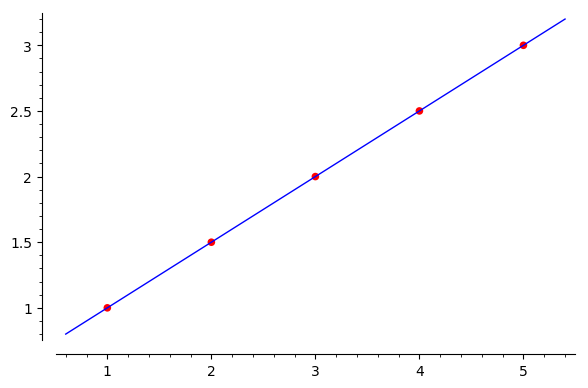

In [19]:
### linear data
data = [(1,1),(2,1.5),(3,2),(4,2.5),(5,3)] 

a,b,p = linear_regression(data,True)
print(a,b)
p.show()

(1/2, 3/10)


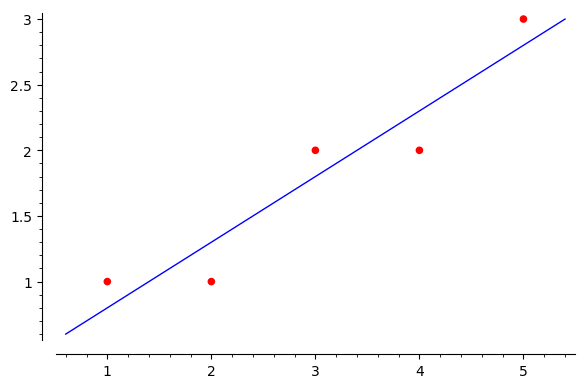

In [20]:
### non-linear data
data = [(1,1),(2,1),(3,2),(4,2),(5,3)] 

a,b,p = linear_regression(data,True)
print(a,b)
p.show()

(0.1910367696500197, 1.0160041016768095)


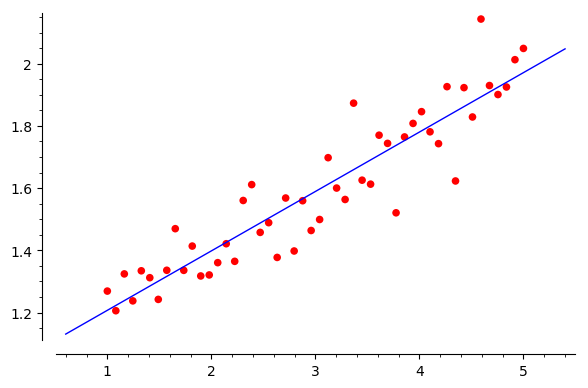

In [21]:
### almost-linear data
import numpy as np
x = np.linspace(1,5,50)
y = x*0.2 + 1 + 0.1*np.random.randn(50)
data = list(zip(x,y))

a,b,p = linear_regression(data,True)
print(a,b)
p.show()